In [191]:
states = [1, 0] #1 being cooperating, 0 being defecting

defectorUtility = -0.5 
 
politicalClimate=0.2 #Being environment-positive -- Adding some random number being events in life lik emovies etc.


class Agent:
    def __init__(self, state):
        self.state = state
    
    def consider(self, neighbour):
        
        neighboursWeight = 0.5 # or adding randomness here
        
        weight = self.state + politicalClimate + defectorUtility + neighboursWeight*neighbour.state
        
        if(weight > 0):
            self.state = 1
        else:
            self.state = 0

In [192]:
from numpy.random import choice
import random
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.agents = [] #Add topology - and add some random people far in the network from time to time, changing the network
        #Time dependent topology
        self.graph = nx.Graph()

    def addAgent(self, agent):
        self.agents.append(agent)
    
    def interact(self):
        nodeIndex = random.randint(0, len(self.graph) - 1)
        node = self.graph.nodes[nodeIndex]['agent']
        
        neighbours =  list(self.graph.adj[nodeIndex].keys())
        
        chosenNeighbourIndex = neighbours[random.randint(0, len(neighbours)-1)]
        chosenNeighbour = self.graph.nodes[chosenNeighbourIndex]['agent']
        
        node.consider(chosenNeighbour)
        
        
    def printModel(self):
        count = 0
        #for agent in self.agents:
            #count += agent.state
        #print(count)
        
        color_map = []
        for node in self.graph:
            if self.graph.nodes[node]['agent'].state== 1:
                color_map.append('blue')
            else: color_map.append('green')   

        nx.draw(self.graph, node_color = color_map,)
        

In [193]:
import networkx as nx

def makeGridModel(n):
    model = Model()
    agents = [[0] * n for r in range(n)]
    for i in range(n):
        for j in range (n):
            agent1 = Agent(states[random.randint(0,1)])
            agents[i][j] = agent1
            model.graph.add_node(i*n+j, agent=agent1)
            if(i!=0):
                model.graph.add_edge(i*n+j, (i-1)*n+j)
            if(j!=0):
                model.graph.add_edge(i*n+j, i*n+j-1)
    
    return model

In [194]:
import matplotlib.pyplot as plt



def draw_model(model):

    color_map = []
    for node in model.graph:
        if model.graph.nodes[node]['agent'].state== 1:
            color_map.append('green')
        else: color_map.append('red')   

    nx.draw_spectral(model.graph, node_color = color_map,)



In [195]:
def simulate(n, k):
    model = makeGridModel(n)
    draw_model(model)
    
    for i in range(k):
        model.interact()
        
    return model

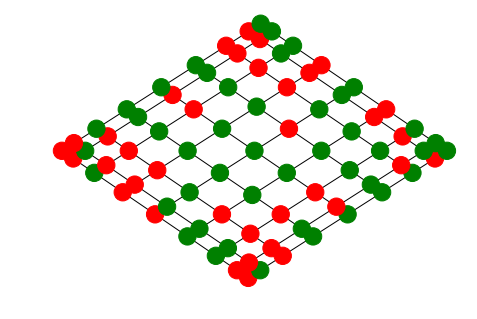

In [196]:
model= simulate(9, 200)


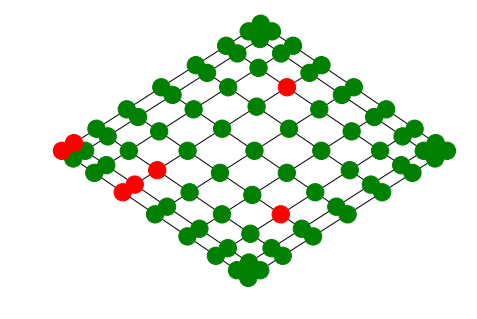

In [197]:
draw_model(model)